In [1]:
import sys

sys.path.insert(0, "C:/Users/julie/PycharmProjects/SoundLandscape/")

In [2]:
# -*- coding: utf-8 -*-
import cv2
from PIL import Image
import numpy as np

import keras

from src import settings


class PredictMood(object):
    """Module to predict the mood based on a picture."""

    def __init__(self):
        """Initator."""
        self.model = keras.models.load_model(settings.MOOD_MODEL_PATH)
        self.mood_classes = {
            0: 'angry', 1: 'disgust', 2: 'fear', 
            3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprised'
        }

    @staticmethod
    def process_img(img):
        """Transform image to go through the deep architecture.

        :param img: (PIL.image) image
        :return: (np.array) image processed
        """
        input_image = np.asarray(img, dtype=np.uint8)
        resized = cv2.resize(input_image, (71, 71))
        resized_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
        resized_gray = resized_gray[np.newaxis, :, :, np.newaxis]
        resized_gray_scale = resized_gray / 255.0

        return resized_gray_scale

    def predict(self, img):
        """Predict the mood based on a picture.

        :param img: (PIL.image) image
        :return: (str) mood
        """
        processed_img = self.process_img(img)
        mood_index = np.argmax(self.model.predict(processed_img))

        return self.mood_classes[mood_index]


class PredictLandscape(object):
    """Predict landscape based on a picture."""

    def __init__(self):
        """Initiator."""
        self.model = keras.models.load_model(settings.LAND_MODEL_PATH)
        self.landscape_classes = {
            0: "city", 1: "field", 2: "forest", 3: "lake",
            4: "mountain", 5: "ocean", 6: "road"
        }

    @staticmethod
    def process_img(img):
        """Transform image to go through the deep architecture.

        :param img: (PIL.image) image
        :return: (np.array) image processed
        """
        input_image = np.asarray(img, dtype=np.uint8)
        resized = cv2.resize(input_image, (224, 224))
        resized_rgb = resized[np.newaxis, :, :]
        resized_rgb_scale = resized_rgb / 255.0

        return resized_rgb_scale

    def predict(self, img):
        """Predict the landscape based on a picture.

        :param img: (PIL.image) image
        :return: (str) landscape
        """
        processed_img = self.process_img(img)
        landscape_index = np.argmax(self.model.predict(processed_img))

        return self.landscape_classes[landscape_index]


if __name__ == '__main__':
    model_landscape = PredictLandscape()
    img = Image.open("C:/Users/julie/PycharmProjects/SoundLandscape/data/raw/landscape/forest.jpg")
    landscape = model_landscape.predict(img)
    print(landscape)
    
    model_mood = PredictMood()
    img = Image.open("C:/Users/julie/PycharmProjects/SoundLandscape/data/raw/mood/happy.jpg")
    mood = model_mood.predict(img)
    print(mood)

Using TensorFlow backend.


forest
neutral


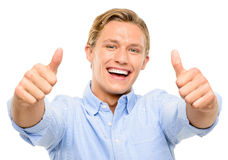

In [7]:
img